<a href="https://colab.research.google.com/github/Adib6399/Adib6399/blob/main/car_price_pred(prj).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Over fitting and under fitting
#OverFitting:-when we have less error in training data and more errors in testing data ie:-less bias and more varience
#if the size of training data is low
#model is too complex(more input features)
#quality of training data is low
#then there is a chance for occurrence of overfitting

#we can avoid overfitting by making the model simple,improve size and quality of training data
#UnderFitting:high bias and less varience(when less error in testing data and more error in training data)
#reasons:-model is too simple
#less input features
#features are not scaled

#reduce underfitting:-increase model complexity
#increase no of input features
#remove noise data
#increase no of epochs

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv('/content/train-data.csv')
df

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,6014,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.4 kmpl,1248 CC,74 bhp,5.0,7.88 Lakh,4.75
6015,6015,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,First,24.4 kmpl,1120 CC,71 bhp,5.0,NaN,4.00
6016,6016,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14.0 kmpl,2498 CC,112 bhp,8.0,NaN,2.90
6017,6017,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,18.9 kmpl,998 CC,67.1 bhp,5.0,NaN,2.65


In [ ]:
df.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [ ]:
df.tail()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
6014,6014,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.4 kmpl,1248 CC,74 bhp,5.0,7.88 Lakh,4.75
6015,6015,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,First,24.4 kmpl,1120 CC,71 bhp,5.0,NaN,4.00
6016,6016,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14.0 kmpl,2498 CC,112 bhp,8.0,NaN,2.90
6017,6017,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,18.9 kmpl,998 CC,67.1 bhp,5.0,NaN,2.65
6018,6018,Chevrolet Beat Diesel,Hyderabad,2011,47000,Diesel,Manual,First,25.44 kmpl,936 CC,57.6 bhp,5.0,NaN,2.50


In [ ]:
df.columns

Index(['Unnamed: 0', 'Name', 'Location', 'Year', 'Kilometers_Driven',
       'Fuel_Type', 'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power',
       'Seats', 'New_Price', 'Price'],
      dtype='object')

In [ ]:
df.dtypes

,0
Unnamed: 0,int64
Name,object
Location,object
Year,int64
Kilometers_Driven,int64
Fuel_Type,object
Transmission,object
Owner_Type,object
Mileage,object
Engine,object


In [ ]:
df.isna().sum()

,0
Unnamed: 0,0
Name,0
Location,0
Year,0
Kilometers_Driven,0
Fuel_Type,0
Transmission,0
Owner_Type,0
Mileage,2
Engine,36


In [ ]:
Fuel=df['Fuel_Type'].value_counts()
Fuel

,count
Fuel_Type,
Diesel,3205
Petrol,2746
CNG,56
LPG,10
Electric,2


<BarContainer object of 5 artists>

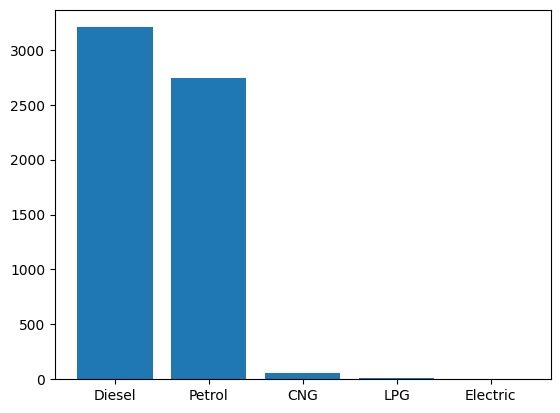

In [ ]:
plt.bar(Fuel.index,Fuel.values)

In [ ]:
Transmission=df['Transmission'].value_counts()
Transmission

,count
Transmission,
Manual,4299
Automatic,1720


<BarContainer object of 2 artists>

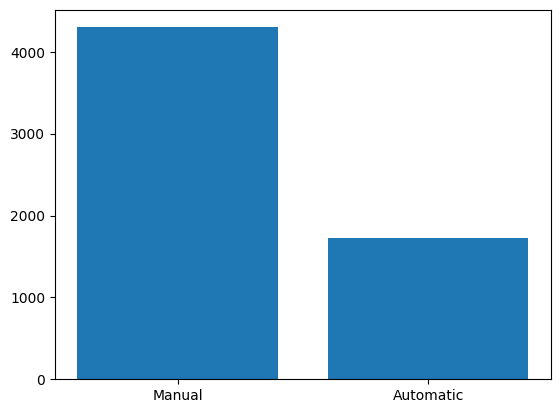

In [ ]:
plt.bar(Transmission.index,Transmission.values)

In [ ]:
owner=df['Owner_Type'].value_counts()
owner

,count
Owner_Type,
First,4929
Second,968
Third,113
Fourth & Above,9


<BarContainer object of 4 artists>

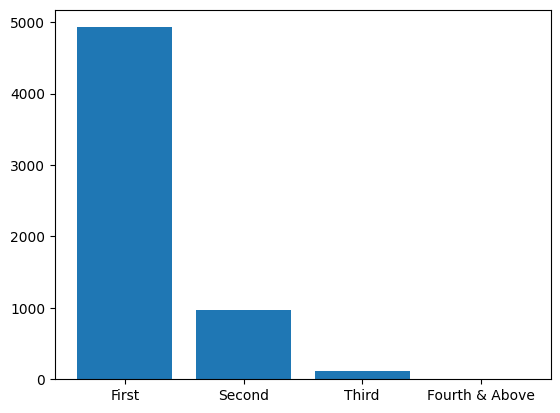

In [ ]:
plt.bar(owner.index,owner.values)

In [ ]:
loc=df['Location'].value_counts()
loc


,count
Location,
Mumbai,790
Hyderabad,742
Kochi,651
Coimbatore,636
Pune,622
Delhi,554
Kolkata,535
Chennai,494
Jaipur,413


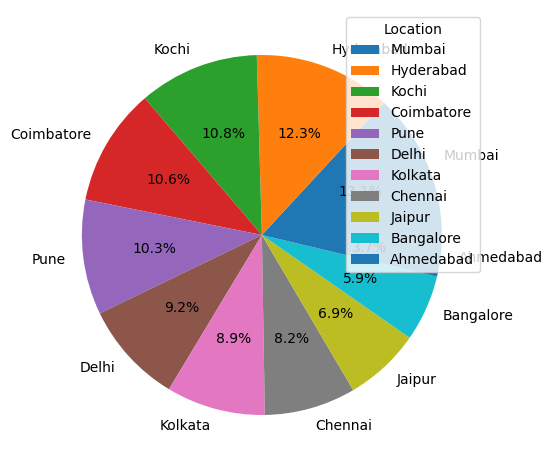

In [ ]:
plt.pie(loc.values,labels=loc.index,autopct='%1.01f%%')
plt.legend(title='Location',loc='upper right')
plt.tight_layout()

In [ ]:
name=df['Name'].value_counts()
name

,count
Name,
Mahindra XUV500 W8 2WD,49
Maruti Swift VDI,45
Honda City 1.5 S MT,34
Maruti Swift Dzire VDI,34
Maruti Swift VDI BSIV,31
...,...
Ford Fiesta Titanium 1.5 TDCi,1
Mahindra Scorpio S10 AT 4WD,1
Hyundai i20 1.2 Era,1


In [ ]:
df['Brand'] = df['Name'].apply(lambda x:x.split(' ')[0])
brand=df['Brand'].value_counts()
brand
#we can do label encoding or pickup only the brand names of the car

,count
Brand,
Maruti,1211
Hyundai,1107
Honda,608
Toyota,411
Mercedes-Benz,318
Volkswagen,315
Ford,300
Mahindra,272
BMW,267


In [ ]:
df['Brand'].unique()

array(['Maruti', 'Hyundai', 'Honda', 'Audi', 'Nissan', 'Toyota',
       'Volkswagen', 'Tata', 'Land', 'Mitsubishi', 'Renault',
       'Mercedes-Benz', 'BMW', 'Mahindra', 'Ford', 'Porsche', 'Datsun',
       'Jaguar', 'Volvo', 'Chevrolet', 'Skoda', 'Mini', 'Fiat', 'Jeep',
       'Smart', 'Ambassador', 'Isuzu', 'ISUZU', 'Force', 'Bentley',
       'Lamborghini'], dtype=object)

In [ ]:
#another way to split brand name
#df['brand']=df['Name'].str.split(' ').str.get(0)
#brd=df['brand'].value_counts()
#brd

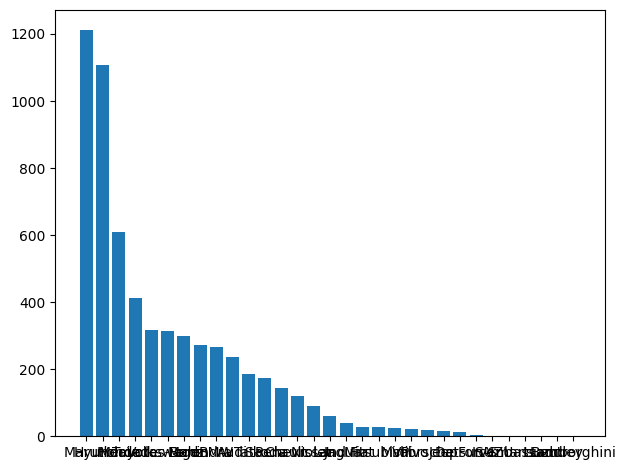

In [ ]:
plt.bar(brand.index,brand.values)
plt.tight_layout()

#get_dummies

works similar to one hot encoding but we predict even after dropping one column



In [ ]:
df1=pd.get_dummies(df[['Location','Fuel_Type','Transmission','Owner_Type','Brand']],dtype=int,drop_first=True)
df1

,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,...,Brand_Mitsubishi,Brand_Nissan,Brand_Porsche,Brand_Renault,Brand_Skoda,Brand_Smart,Brand_Tata,Brand_Toyota,Brand_Volkswagen,Brand_Volvo
0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6015,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6016,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6017,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df1.shape

(6019, 48)

In [ ]:
df

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Brand
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75,Maruti
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50,Hyundai
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50,Honda
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00,Maruti
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74,Audi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,6014,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.4 kmpl,1248 CC,74 bhp,5.0,7.88 Lakh,4.75,Maruti
6015,6015,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,First,24.4 kmpl,1120 CC,71 bhp,5.0,NaN,4.00,Hyundai
6016,6016,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14.0 kmpl,2498 CC,112 bhp,8.0,NaN,2.90,Mahindra
6017,6017,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,18.9 kmpl,998 CC,67.1 bhp,5.0,NaN,2.65,Maruti


In [ ]:
df2=pd.concat([df,df1],axis=1)
df2

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,...,Brand_Mitsubishi,Brand_Nissan,Brand_Porsche,Brand_Renault,Brand_Skoda,Brand_Smart,Brand_Tata,Brand_Toyota,Brand_Volkswagen,Brand_Volvo
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,...,0,0,0,0,0,0,0,0,0,0
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,...,0,0,0,0,0,0,0,0,0,0
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,...,0,0,0,0,0,0,0,0,0,0
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,...,0,0,0,0,0,0,0,0,0,0
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,6014,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.4 kmpl,1248 CC,...,0,0,0,0,0,0,0,0,0,0
6015,6015,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,First,24.4 kmpl,1120 CC,...,0,0,0,0,0,0,0,0,0,0
6016,6016,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14.0 kmpl,2498 CC,...,0,0,0,0,0,0,0,0,0,0
6017,6017,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,18.9 kmpl,998 CC,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df2.columns

Index(['Unnamed: 0', 'Name', 'Location', 'Year', 'Kilometers_Driven',
       'Fuel_Type', 'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power',
       'Seats', 'New_Price', 'Price', 'Brand', 'Location_Bangalore',
       'Location_Chennai', 'Location_Coimbatore', 'Location_Delhi',
       'Location_Hyderabad', 'Location_Jaipur', 'Location_Kochi',
       'Location_Kolkata', 'Location_Mumbai', 'Location_Pune',
       'Fuel_Type_Diesel', 'Fuel_Type_Electric', 'Fuel_Type_LPG',
       'Fuel_Type_Petrol', 'Transmission_Manual', 'Owner_Type_Fourth & Above',
       'Owner_Type_Second', 'Owner_Type_Third', 'Brand_Audi', 'Brand_BMW',
       'Brand_Bentley', 'Brand_Chevrolet', 'Brand_Datsun', 'Brand_Fiat',
       'Brand_Force', 'Brand_Ford', 'Brand_Honda', 'Brand_Hyundai',
       'Brand_ISUZU', 'Brand_Isuzu', 'Brand_Jaguar', 'Brand_Jeep',
       'Brand_Lamborghini', 'Brand_Land', 'Brand_Mahindra', 'Brand_Maruti',
       'Brand_Mercedes-Benz', 'Brand_Mini', 'Brand_Mitsubishi', 'Brand_Nissan',


In [ ]:
df2.drop(['Unnamed: 0','Name','Location','Fuel_Type','Transmission','Owner_Type','New_Price','Brand'],axis=1,inplace=True)
df2

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price,Location_Bangalore,Location_Chennai,Location_Coimbatore,...,Brand_Mitsubishi,Brand_Nissan,Brand_Porsche,Brand_Renault,Brand_Skoda,Brand_Smart,Brand_Tata,Brand_Toyota,Brand_Volkswagen,Brand_Volvo
0,2010,72000,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2015,41000,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2011,46000,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,2012,87000,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,2013,40670,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,2014,27365,28.4 kmpl,1248 CC,74 bhp,5.0,4.75,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6015,2015,100000,24.4 kmpl,1120 CC,71 bhp,5.0,4.00,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6016,2012,55000,14.0 kmpl,2498 CC,112 bhp,8.0,2.90,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6017,2013,46000,18.9 kmpl,998 CC,67.1 bhp,5.0,2.65,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
#how to change unit
df2['Mileage']=df2['Mileage'].str.replace('kmpl','')
df2['Mileage']=df2['Mileage'].str.replace('km/kg','')
df2['Engine']=df2['Engine'].str.replace('CC','')
df2['Power']=df2['Power'].str.replace('bhp','')
df2['Mileage']=df2['Mileage'].str.replace('null','0')
df2['Engine']=df2['Engine'].str.replace('null','0')
df2['Power']=df2['Power'].str.replace('null','0')
df2


,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price,Location_Bangalore,Location_Chennai,Location_Coimbatore,...,Brand_Mitsubishi,Brand_Nissan,Brand_Porsche,Brand_Renault,Brand_Skoda,Brand_Smart,Brand_Tata,Brand_Toyota,Brand_Volkswagen,Brand_Volvo
0,2010,72000,26.6,998,58.16,5.0,1.75,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2015,41000,19.67,1582,126.2,5.0,12.50,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2011,46000,18.2,1199,88.7,5.0,4.50,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,2012,87000,20.77,1248,88.76,7.0,6.00,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,2013,40670,15.2,1968,140.8,5.0,17.74,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,2014,27365,28.4,1248,74,5.0,4.75,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6015,2015,100000,24.4,1120,71,5.0,4.00,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6016,2012,55000,14.0,2498,112,8.0,2.90,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6017,2013,46000,18.9,998,67.1,5.0,2.65,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df2.dtypes

,0
Year,int64
Kilometers_Driven,int64
Mileage,object
Engine,object
Power,object
Seats,float64
Price,float64
Location_Bangalore,int64
Location_Chennai,int64
Location_Coimbatore,int64


In [ ]:
df2['Engine']=df2['Engine'].astype(float)
df2['Power']=df2['Power'].astype(float)
df2['Mileage']=df2['Mileage'].astype(float)
df2.dtypes

,0
Year,int64
Kilometers_Driven,int64
Mileage,float64
Engine,float64
Power,float64
Seats,float64
Price,float64
Location_Bangalore,int64
Location_Chennai,int64
Location_Coimbatore,int64


In [ ]:
df2.loc[df2.Engine==0,'Engine']=np.NaN
df2.loc[df2.Power==0,'Power']=np.NaN
df2.loc[df2.Mileage==0,'Mileage']=np.NaN
df2.isna().sum()

,0
Year,0
Kilometers_Driven,0
Mileage,70
Engine,36
Power,143
Seats,42
Price,0
Location_Bangalore,0
Location_Chennai,0
Location_Coimbatore,0


In [ ]:
df2['Mileage']=df2['Mileage'].fillna(df2['Mileage'].mean())
df2['Engine']=df2['Engine'].fillna(df2['Engine'].mean())
df2['Power']=df2['Power'].fillna(df2['Power'].mean())
df2['Seats']=df2['Seats'].fillna(df2['Seats'].mode() [0])
df2.isna().sum()

,0
Year,0
Kilometers_Driven,0
Mileage,0
Engine,0
Power,0
Seats,0
Price,0
Location_Bangalore,0
Location_Chennai,0
Location_Coimbatore,0


In [ ]:
x=df2.drop('Price',axis=1)
x

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,...,Brand_Mitsubishi,Brand_Nissan,Brand_Porsche,Brand_Renault,Brand_Skoda,Brand_Smart,Brand_Tata,Brand_Toyota,Brand_Volkswagen,Brand_Volvo
0,2010,72000,26.60,998.0,58.16,5.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2015,41000,19.67,1582.0,126.20,5.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2011,46000,18.20,1199.0,88.70,5.0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2012,87000,20.77,1248.0,88.76,7.0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2013,40670,15.20,1968.0,140.80,5.0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,2014,27365,28.40,1248.0,74.00,5.0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
6015,2015,100000,24.40,1120.0,71.00,5.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6016,2012,55000,14.00,2498.0,112.00,8.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6017,2013,46000,18.90,998.0,67.10,5.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
y=df2['Price']
y

,Price
0,1.75
1,12.50
2,4.50
3,6.00
4,17.74
...,...
6014,4.75
6015,4.00
6016,2.90
6017,2.65


In [ ]:
df3=pd.read_csv('/content/test-data.csv')
df3

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price
0,0,Maruti Alto K10 LXI CNG,Delhi,2014,40929,CNG,Manual,First,32.26 km/kg,998 CC,58.2 bhp,4.0,NaN
1,1,Maruti Alto 800 2016-2019 LXI,Coimbatore,2013,54493,Petrol,Manual,Second,24.7 kmpl,796 CC,47.3 bhp,5.0,NaN
2,2,Toyota Innova Crysta Touring Sport 2.4 MT,Mumbai,2017,34000,Diesel,Manual,First,13.68 kmpl,2393 CC,147.8 bhp,7.0,25.27 Lakh
3,3,Toyota Etios Liva GD,Hyderabad,2012,139000,Diesel,Manual,First,23.59 kmpl,1364 CC,null bhp,5.0,NaN
4,4,Hyundai i20 Magna,Mumbai,2014,29000,Petrol,Manual,First,18.5 kmpl,1197 CC,82.85 bhp,5.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1229,1229,Volkswagen Vento Diesel Trendline,Hyderabad,2011,89411,Diesel,Manual,First,20.54 kmpl,1598 CC,103.6 bhp,5.0,NaN
1230,1230,Volkswagen Polo GT TSI,Mumbai,2015,59000,Petrol,Automatic,First,17.21 kmpl,1197 CC,103.6 bhp,5.0,NaN
1231,1231,Nissan Micra Diesel XV,Kolkata,2012,28000,Diesel,Manual,First,23.08 kmpl,1461 CC,63.1 bhp,5.0,NaN
1232,1232,Volkswagen Polo GT TSI,Pune,2013,52262,Petrol,Automatic,Third,17.2 kmpl,1197 CC,103.6 bhp,5.0,NaN


In [ ]:
df3.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price
0,0,Maruti Alto K10 LXI CNG,Delhi,2014,40929,CNG,Manual,First,32.26 km/kg,998 CC,58.2 bhp,4.0,NaN
1,1,Maruti Alto 800 2016-2019 LXI,Coimbatore,2013,54493,Petrol,Manual,Second,24.7 kmpl,796 CC,47.3 bhp,5.0,NaN
2,2,Toyota Innova Crysta Touring Sport 2.4 MT,Mumbai,2017,34000,Diesel,Manual,First,13.68 kmpl,2393 CC,147.8 bhp,7.0,25.27 Lakh
3,3,Toyota Etios Liva GD,Hyderabad,2012,139000,Diesel,Manual,First,23.59 kmpl,1364 CC,null bhp,5.0,NaN
4,4,Hyundai i20 Magna,Mumbai,2014,29000,Petrol,Manual,First,18.5 kmpl,1197 CC,82.85 bhp,5.0,NaN


In [ ]:
df3.tail()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price
1229,1229,Volkswagen Vento Diesel Trendline,Hyderabad,2011,89411,Diesel,Manual,First,20.54 kmpl,1598 CC,103.6 bhp,5.0,NaN
1230,1230,Volkswagen Polo GT TSI,Mumbai,2015,59000,Petrol,Automatic,First,17.21 kmpl,1197 CC,103.6 bhp,5.0,NaN
1231,1231,Nissan Micra Diesel XV,Kolkata,2012,28000,Diesel,Manual,First,23.08 kmpl,1461 CC,63.1 bhp,5.0,NaN
1232,1232,Volkswagen Polo GT TSI,Pune,2013,52262,Petrol,Automatic,Third,17.2 kmpl,1197 CC,103.6 bhp,5.0,NaN
1233,1233,Mercedes-Benz E-Class 2009-2013 E 220 CDI Avan...,Kochi,2014,72443,Diesel,Automatic,First,10.0 kmpl,2148 CC,170 bhp,5.0,NaN


In [ ]:
df3.columns

Index(['Unnamed: 0', 'Name', 'Location', 'Year', 'Kilometers_Driven',
       'Fuel_Type', 'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power',
       'Seats', 'New_Price'],
      dtype='object')

In [ ]:
df3.dtypes

,0
Unnamed: 0,int64
Name,object
Location,object
Year,int64
Kilometers_Driven,int64
Fuel_Type,object
Transmission,object
Owner_Type,object
Mileage,object
Engine,object


In [ ]:
df3.isna().sum()

,0
Unnamed: 0,0
Name,0
Location,0
Year,0
Kilometers_Driven,0
Fuel_Type,0
Transmission,0
Owner_Type,0
Mileage,0
Engine,10


In [ ]:
fuel=df3['Fuel_Type'].value_counts()
fuel

,count
Fuel_Type,
Diesel,647
Petrol,579
CNG,6
LPG,2


<BarContainer object of 4 artists>

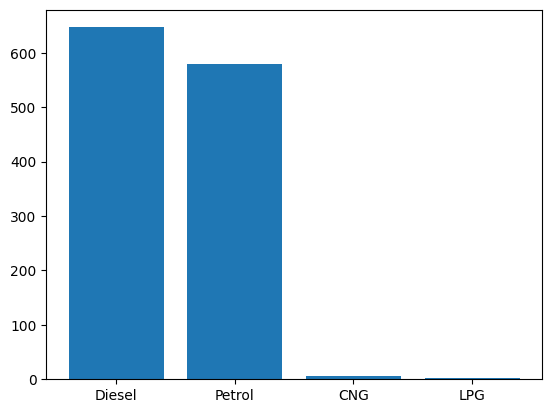

In [ ]:
plt.bar(fuel.index,fuel.values)

In [ ]:
trans=df3['Transmission'].value_counts()
trans

,count
Transmission,
Manual,905
Automatic,329


<BarContainer object of 2 artists>

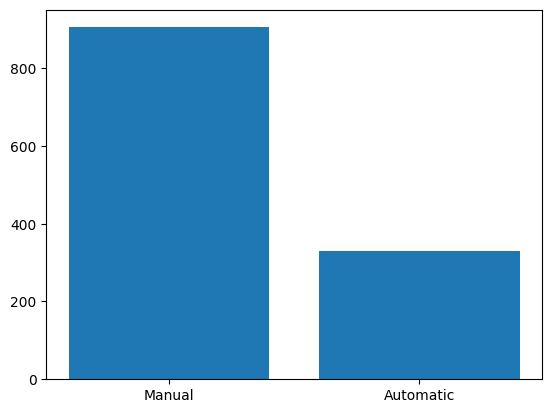

In [ ]:
plt.bar(trans.index,trans.values)

In [ ]:
owner2=df3['Owner_Type'].value_counts()
owner2

,count
Owner_Type,
First,1023
Second,184
Third,24
Fourth & Above,3


<BarContainer object of 4 artists>

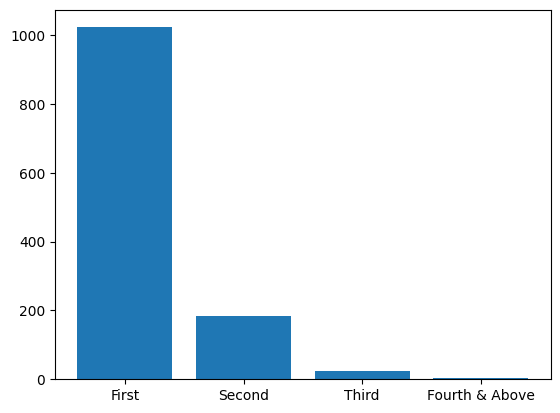

In [ ]:
plt.bar(owner2.index,owner2.values)

In [ ]:
loc2=df3['Location'].value_counts()
loc2

,count
Location,
Mumbai,159
Pune,143
Coimbatore,136
Hyderabad,134
Kochi,121
Kolkata,119
Delhi,106
Chennai,97
Jaipur,86


<BarContainer object of 11 artists>

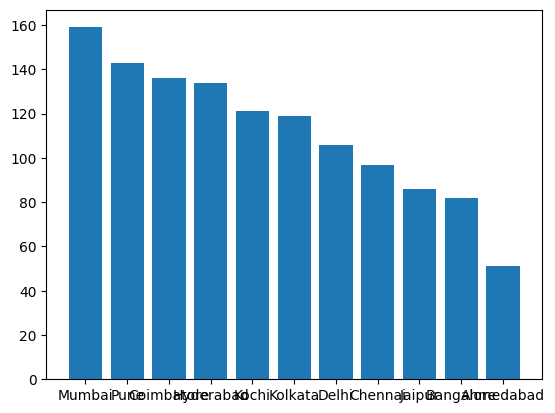

In [ ]:
plt.bar(loc2.index,loc2.values)

In [ ]:
df3['Brand']=df3['Name'].str.split(' ').str.get(0)
brand=df3['Brand'].value_counts()
brand

,count
Brand,
Maruti,233
Hyundai,233
Honda,135
Toyota,96
Mercedes-Benz,62
Mahindra,59
Volkswagen,59
Ford,51
Audi,49


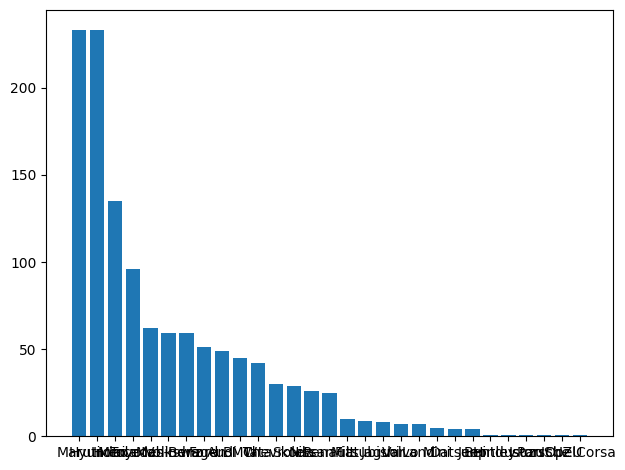

In [ ]:
plt.bar(brand.index,brand.values)
plt.tight_layout()

In [ ]:
df4=pd.get_dummies(df3[['Location','Fuel_Type','Transmission','Owner_Type','Brand']],dtype=int,drop_first=True)
df4

,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,...,Brand_Mitsubishi,Brand_Nissan,Brand_OpelCorsa,Brand_Porsche,Brand_Renault,Brand_Skoda,Brand_Tata,Brand_Toyota,Brand_Volkswagen,Brand_Volvo
0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1229,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1230,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
1231,0,0,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
1232,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
df5=pd.concat([df3,df4],axis=1)
df5

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,...,Brand_Mitsubishi,Brand_Nissan,Brand_OpelCorsa,Brand_Porsche,Brand_Renault,Brand_Skoda,Brand_Tata,Brand_Toyota,Brand_Volkswagen,Brand_Volvo
0,0,Maruti Alto K10 LXI CNG,Delhi,2014,40929,CNG,Manual,First,32.26 km/kg,998 CC,...,0,0,0,0,0,0,0,0,0,0
1,1,Maruti Alto 800 2016-2019 LXI,Coimbatore,2013,54493,Petrol,Manual,Second,24.7 kmpl,796 CC,...,0,0,0,0,0,0,0,0,0,0
2,2,Toyota Innova Crysta Touring Sport 2.4 MT,Mumbai,2017,34000,Diesel,Manual,First,13.68 kmpl,2393 CC,...,0,0,0,0,0,0,0,1,0,0
3,3,Toyota Etios Liva GD,Hyderabad,2012,139000,Diesel,Manual,First,23.59 kmpl,1364 CC,...,0,0,0,0,0,0,0,1,0,0
4,4,Hyundai i20 Magna,Mumbai,2014,29000,Petrol,Manual,First,18.5 kmpl,1197 CC,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1229,1229,Volkswagen Vento Diesel Trendline,Hyderabad,2011,89411,Diesel,Manual,First,20.54 kmpl,1598 CC,...,0,0,0,0,0,0,0,0,1,0
1230,1230,Volkswagen Polo GT TSI,Mumbai,2015,59000,Petrol,Automatic,First,17.21 kmpl,1197 CC,...,0,0,0,0,0,0,0,0,1,0
1231,1231,Nissan Micra Diesel XV,Kolkata,2012,28000,Diesel,Manual,First,23.08 kmpl,1461 CC,...,0,1,0,0,0,0,0,0,0,0
1232,1232,Volkswagen Polo GT TSI,Pune,2013,52262,Petrol,Automatic,Third,17.2 kmpl,1197 CC,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
df5.drop(['Unnamed: 0','Name','Location','Fuel_Type','Transmission','Owner_Type','New_Price','Brand'],axis=1,inplace=True)
df5

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,...,Brand_Mitsubishi,Brand_Nissan,Brand_OpelCorsa,Brand_Porsche,Brand_Renault,Brand_Skoda,Brand_Tata,Brand_Toyota,Brand_Volkswagen,Brand_Volvo
0,2014,40929,32.26 km/kg,998 CC,58.2 bhp,4.0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,2013,54493,24.7 kmpl,796 CC,47.3 bhp,5.0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,2017,34000,13.68 kmpl,2393 CC,147.8 bhp,7.0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,2012,139000,23.59 kmpl,1364 CC,null bhp,5.0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,2014,29000,18.5 kmpl,1197 CC,82.85 bhp,5.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1229,2011,89411,20.54 kmpl,1598 CC,103.6 bhp,5.0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1230,2015,59000,17.21 kmpl,1197 CC,103.6 bhp,5.0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1231,2012,28000,23.08 kmpl,1461 CC,63.1 bhp,5.0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1232,2013,52262,17.2 kmpl,1197 CC,103.6 bhp,5.0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
df5['Mileage']=df5['Mileage'].str.replace('kmpl','')
df5['Mileage']=df5['Mileage'].str.replace('km/kg','')
df5['Engine']=df5['Engine'].str.replace('CC','')
df5['Power']=df5['Power'].str.replace('bhp','')
df5['Mileage']=df5['Mileage'].str.replace('null','0')
df5['Engine']=df5['Engine'].str.replace('null','0')
df5['Power']=df5['Power'].str.replace('null','0')
df5





,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,...,Brand_Mitsubishi,Brand_Nissan,Brand_OpelCorsa,Brand_Porsche,Brand_Renault,Brand_Skoda,Brand_Tata,Brand_Toyota,Brand_Volkswagen,Brand_Volvo
0,2014,40929,32.26,998,58.2,4.0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,2013,54493,24.7,796,47.3,5.0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,2017,34000,13.68,2393,147.8,7.0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,2012,139000,23.59,1364,0,5.0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,2014,29000,18.5,1197,82.85,5.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1229,2011,89411,20.54,1598,103.6,5.0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1230,2015,59000,17.21,1197,103.6,5.0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1231,2012,28000,23.08,1461,63.1,5.0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1232,2013,52262,17.2,1197,103.6,5.0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
df5.dtypes

,0
Year,int64
Kilometers_Driven,int64
Mileage,object
Engine,object
Power,object
Seats,float64
Location_Bangalore,int64
Location_Chennai,int64
Location_Coimbatore,int64
Location_Delhi,int64


In [ ]:
df5['Engine']=df5['Engine'].astype(float)
df5['Power']=df5['Power'].astype(float)
df5['Mileage']=df5['Mileage'].astype(float)
df5.dtypes

,0
Year,int64
Kilometers_Driven,int64
Mileage,float64
Engine,float64
Power,float64
Seats,float64
Location_Bangalore,int64
Location_Chennai,int64
Location_Coimbatore,int64
Location_Delhi,int64


In [ ]:
df5.loc[df5.Engine==0,['Engine']]=np.NaN
df5.loc[df5.Power==0,['Power']]=np.NaN
df5.loc[df5.Mileage==0,['Mileage']]=np.NaN
df5.isna().sum()

,0
Year,0
Kilometers_Driven,0
Mileage,13
Engine,10
Power,32
Seats,11
Location_Bangalore,0
Location_Chennai,0
Location_Coimbatore,0
Location_Delhi,0


In [ ]:
df5['Mileage']=df5['Mileage'].fillna(df5['Mileage'].mean())
df5['Engine']=df5['Engine'].fillna(df5['Engine'].mean())
df5['Power']=df5['Power'].fillna(df5['Power'].mean())
df5['Seats']=df5['Seats'].fillna(df5['Seats'].mode() [0])
df5.isna().sum()

,0
Year,0
Kilometers_Driven,0
Mileage,0
Engine,0
Power,0
Seats,0
Location_Bangalore,0
Location_Chennai,0
Location_Coimbatore,0
Location_Delhi,0


In [ ]:
x

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,...,Brand_Mitsubishi,Brand_Nissan,Brand_Porsche,Brand_Renault,Brand_Skoda,Brand_Smart,Brand_Tata,Brand_Toyota,Brand_Volkswagen,Brand_Volvo
0,2010,72000,26.60,998.0,58.16,5.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2015,41000,19.67,1582.0,126.20,5.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2011,46000,18.20,1199.0,88.70,5.0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2012,87000,20.77,1248.0,88.76,7.0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2013,40670,15.20,1968.0,140.80,5.0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,2014,27365,28.40,1248.0,74.00,5.0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
6015,2015,100000,24.40,1120.0,71.00,5.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6016,2012,55000,14.00,2498.0,112.00,8.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6017,2013,46000,18.90,998.0,67.10,5.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
y

,Price
0,1.75
1,12.50
2,4.50
3,6.00
4,17.74
...,...
6014,4.75
6015,4.00
6016,2.90
6017,2.65


In [ ]:
z=df5.drop(['Brand_Hindustan','Brand_OpelCorsa',],axis=1)

In [ ]:
x.drop(['Fuel_Type_Electric','Brand_Lamborghini','Brand_Smart','Brand_Force','Brand_Audi'],axis=1,inplace=True)

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x,y)
y_pred = lr.predict(z)
y_pred

array([ 2.4535847 ,  1.26972859, 16.72302279, ..., -0.03425225,
        5.77243299, 24.73047308])